# Synthetic data examples

In this Notebook we will build synthetic data suitable to Alphalens analysis. This is useful to understand how Alphalens expects the input to be formatted and also it is a good testing environment to experiment with Alphalens.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy import nan
from pandas import (DataFrame, date_range)

from alphalens.tears import (create_returns_tear_sheet,
                      create_information_tear_sheet,
                      create_turnover_tear_sheet,
                      create_summary_tear_sheet,
                      create_full_tear_sheet,
                      create_event_returns_tear_sheet,
                      create_event_study_tear_sheet)

from alphalens.utils import get_clean_factor_and_forward_returns

In [2]:
#
# build price
#
price_index = date_range(start='2015-1-10', end='2015-2-28')
price_index.name = 'date'
tickers = ['A', 'B', 'C', 'D', 'E', 'F']
data = [[1.0025**i, 1.005**i, 1.00**i, 0.995**i, 1.005**i, 1.00**i]
        for i in range(1, 51)]
base_prices = DataFrame(index=price_index, columns=tickers, data=data)

#
# build factor
#
factor_index = date_range(start='2015-1-15', end='2015-2-13')
factor_index.name = 'date'
factor = DataFrame(index=factor_index, columns=tickers,
                   data=[[3, 4, 2, 1, nan, nan], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2]])
factor_groups = {'A': 'Group1', 'B': 'Group2', 'C': 'Group1', 'D': 'Group2', 'E': 'Group1', 'F': 'Group2'}

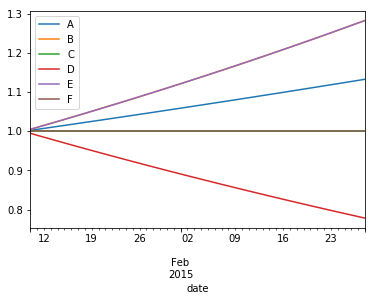

In [3]:
base_prices.plot()
plt.show()

In [4]:
base_prices.head()

A         B    C         D         E    F
date                                                        
2015-01-10  1.002500  1.005000  1.0  0.995000  1.005000  1.0
2015-01-11  1.005006  1.010025  1.0  0.990025  1.010025  1.0
2015-01-12  1.007519  1.015075  1.0  0.985075  1.015075  1.0
2015-01-13  1.010038  1.020151  1.0  0.980150  1.020151  1.0
2015-01-14  1.012563  1.025251  1.0  0.975249  1.025251  1.0

In [5]:
# create artificial intraday prices

today_open = base_prices.copy()
today_open.index += pd.Timedelta('9h30m')

# every day, after 1 hour from open all stocks increase by 0.1%
today_open_1h = today_open.copy()
today_open_1h.index += pd.Timedelta('1h')
today_open_1h += today_open_1h*0.001

# every day, after 3 hours from open all stocks decrease by 0.2%
today_open_3h = today_open.copy()
today_open_3h.index += pd.Timedelta('3h')
today_open_3h -= today_open_3h*0.002

# prices DataFrame will contain all intraday prices
prices = pd.concat([today_open, today_open_1h, today_open_3h]).sort_index()

In [6]:
prices.head(10)

A         B      C         D         E      F
date                                                                     
2015-01-10 09:30:00  1.002500  1.005000  1.000  0.995000  1.005000  1.000
2015-01-10 10:30:00  1.003502  1.006005  1.001  0.995995  1.006005  1.001
2015-01-10 12:30:00  1.000495  1.002990  0.998  0.993010  1.002990  0.998
2015-01-11 09:30:00  1.005006  1.010025  1.000  0.990025  1.010025  1.000
2015-01-11 10:30:00  1.006011  1.011035  1.001  0.991015  1.011035  1.001
2015-01-11 12:30:00  1.002996  1.008005  0.998  0.988045  1.008005  0.998
2015-01-12 09:30:00  1.007519  1.015075  1.000  0.985075  1.015075  1.000
2015-01-12 10:30:00  1.008526  1.016090  1.001  0.986060  1.016090  1.001
2015-01-12 12:30:00  1.005504  1.013045  0.998  0.983105  1.013045  0.998
2015-01-13 09:30:00  1.010038  1.020151  1.000  0.980150  1.020151  1.000

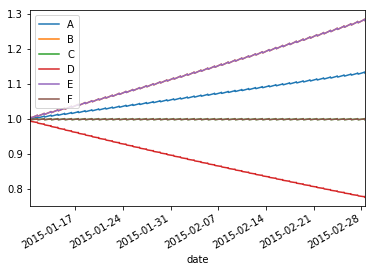

In [7]:
prices.plot()
plt.show()

In [8]:
# Align factor to open price
factor.index += pd.Timedelta('9h30m')
factor = factor.stack()
factor.index = factor.index.set_names(['date', 'asset'])

In [9]:
factor.head(10)

date                 asset
2015-01-15 09:30:00  A        3.0
                     B        4.0
                     C        2.0
                     D        1.0
2015-01-16 09:30:00  A        3.0
                     D        1.0
                     E        4.0
                     F        2.0
2015-01-17 09:30:00  A        3.0
                     B        4.0
dtype: float64

In [10]:
# Period 1: today open to open + 1 hour
# Period 2: today open to open + 3 hours
# Period 3: today open to next day open
# Period 6: today open to 2 days open

factor_data = get_clean_factor_and_forward_returns(
    factor,
    prices,
    groupby=factor_groups,
    quantiles=4,
    periods=(1, 2, 3, 6), 
    filter_zscore=None)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0% -> not exceeded: OK!


In [11]:
factor_data.head(10)

1h     3h      1D        2D  factor   group  \
date                asset                                                   
2015-01-15 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0  Group1   
                    B      0.001 -0.002  0.0050  0.010025     4.0  Group2   
                    C      0.001 -0.002  0.0000  0.000000     2.0  Group1   
                    D      0.001 -0.002 -0.0050 -0.009975     1.0  Group2   
2015-01-16 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0  Group1   
                    D      0.001 -0.002 -0.0050 -0.009975     1.0  Group2   
                    E      0.001 -0.002  0.0050  0.010025     4.0  Group1   
                    F      0.001 -0.002  0.0000  0.000000     2.0  Group2   
2015-01-17 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0  Group1   
                    B      0.001 -0.002  0.0050  0.010025     4.0  Group2   

                           factor_quantile  
date                asset                   
2015-01-15 09:30:00 A                    3  
                    B                    4  
                    C                    2  
                    D                    1  
2015-01-16 09:30:00 A                    3  
                    D                    1  
                    E                    4  
                    F                    2  
2015-01-17 09:30:00 A                    3  
                    B                    4

Quantiles Statistics


min  max  mean  std  count  count %
factor_quantile                                     
1                1.0  1.0   1.0  0.0     30     25.0
2                2.0  2.0   2.0  0.0     30     25.0
3                3.0  3.0   3.0  0.0     30     25.0
4                4.0  4.0   4.0  0.0     30     25.0

Returns Analysis


1h     3h     1D     2D
Ann. alpha                                     420.986 -0.982  0.762  0.764
beta                                             0.000  0.000  0.000  0.000
Mean Period Wise Return Top Quantile (bps)      10.000 -6.671  2.078  2.078
Mean Period Wise Return Bottom Quantile (bps)   10.000 -6.671 -2.088 -2.088
Mean Period Wise Spread (bps)                   -0.000 -0.000  4.167  4.167

Information Analysis


1h     3h        1D        2D
IC Mean           0.005 -0.109  1.000000  1.000000
IC Std.           0.441  0.500  0.000000  0.000000
Risk-Adjusted IC  0.012 -0.217       inf       inf
t-stat(IC)          NaN    NaN       inf       inf
p-value(IC)         NaN    NaN  0.000000  0.000000
IC Skew             NaN    NaN  0.000000  0.000000
IC Kurtosis         NaN    NaN -3.000000 -3.000000

Turnover Analysis


1D   1h     2D   3h
Quantile 1 Mean Turnover   0.000  0.0  0.000  0.0
Quantile 2 Mean Turnover   0.241  0.0  0.393  0.0
Quantile 3 Mean Turnover   0.000  0.0  0.000  0.0
Quantile 4 Mean Turnover   0.241  0.0  0.393  0.0

1h   3h   1D   2D
Mean Factor Rank Autocorrelation  1.0  1.0  1.0  1.0

/home/luca/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:2876: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


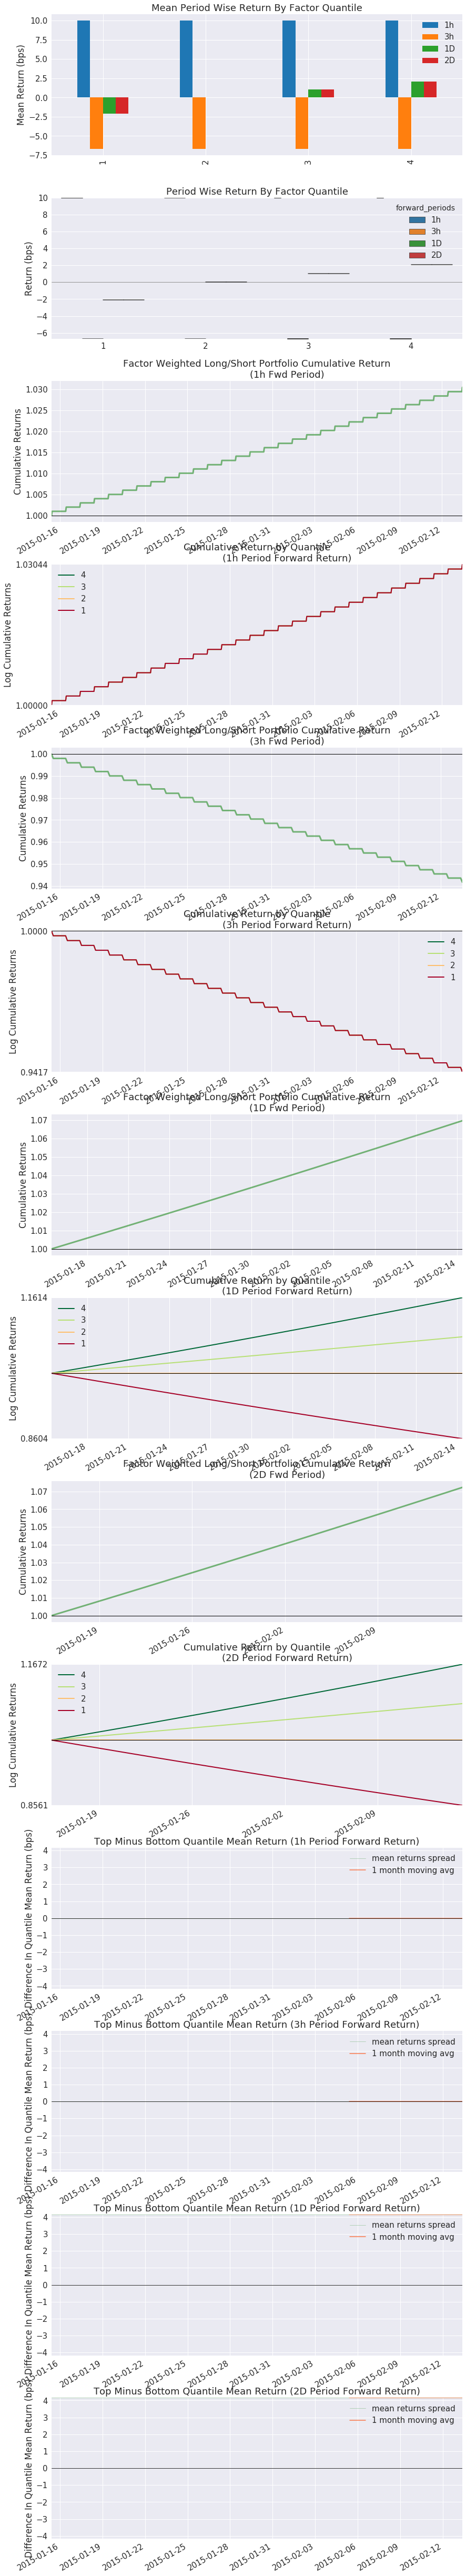

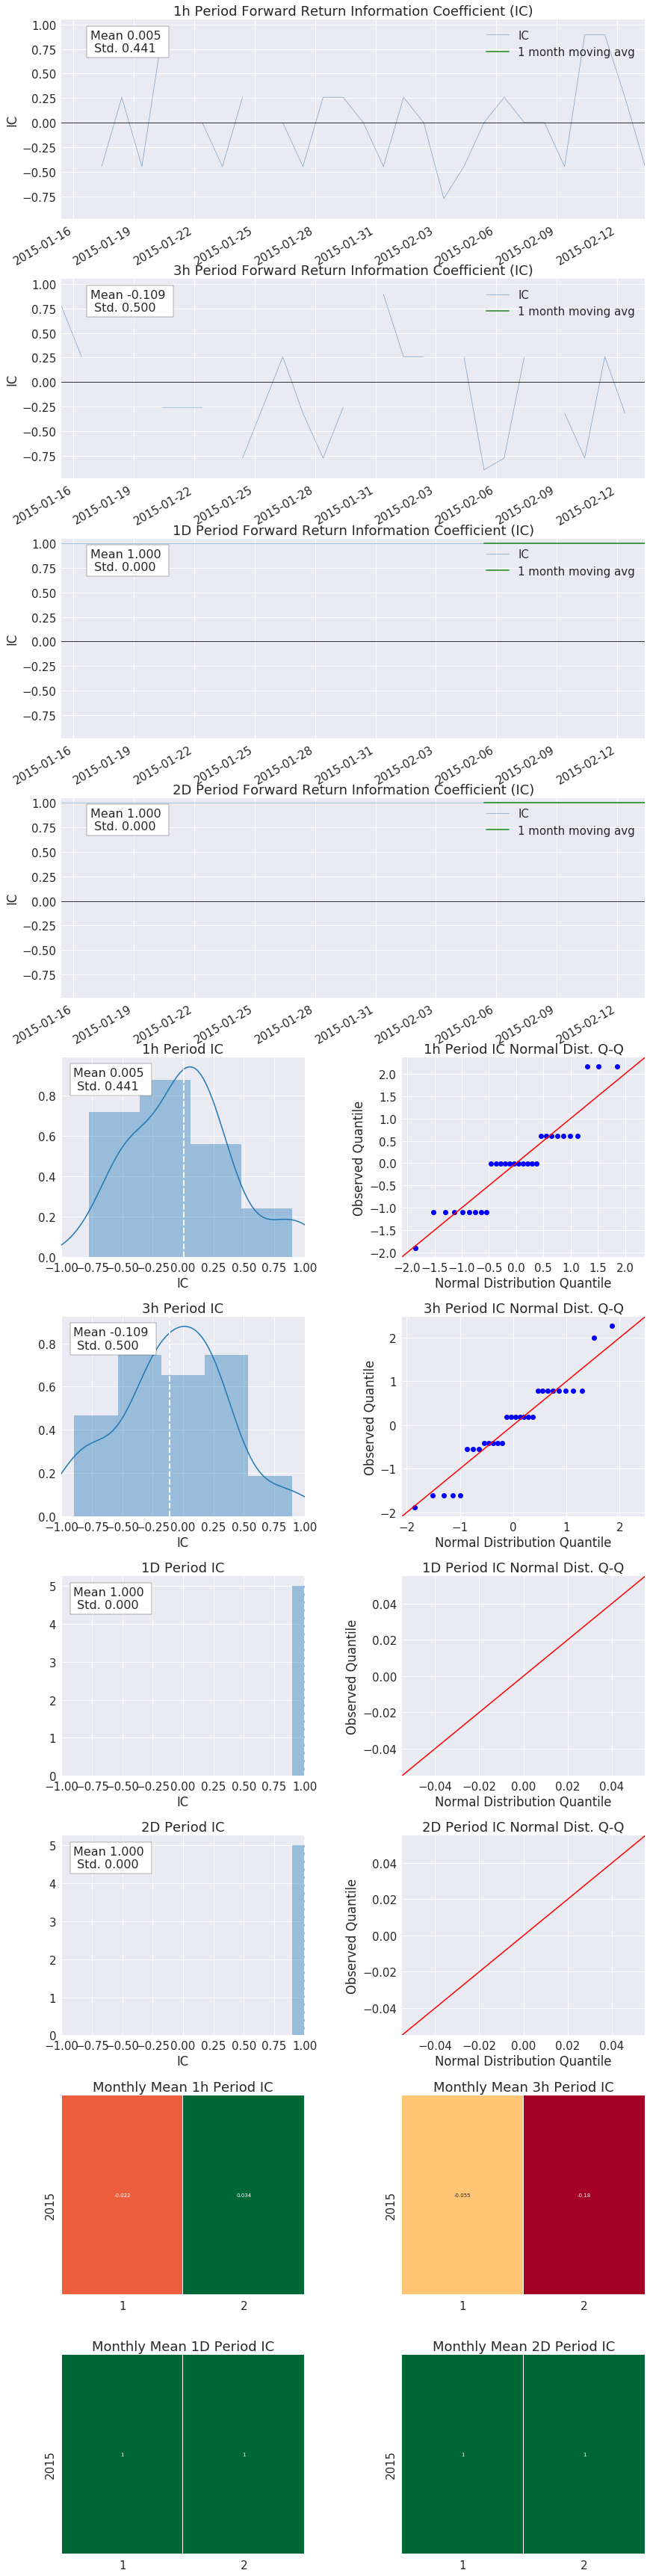

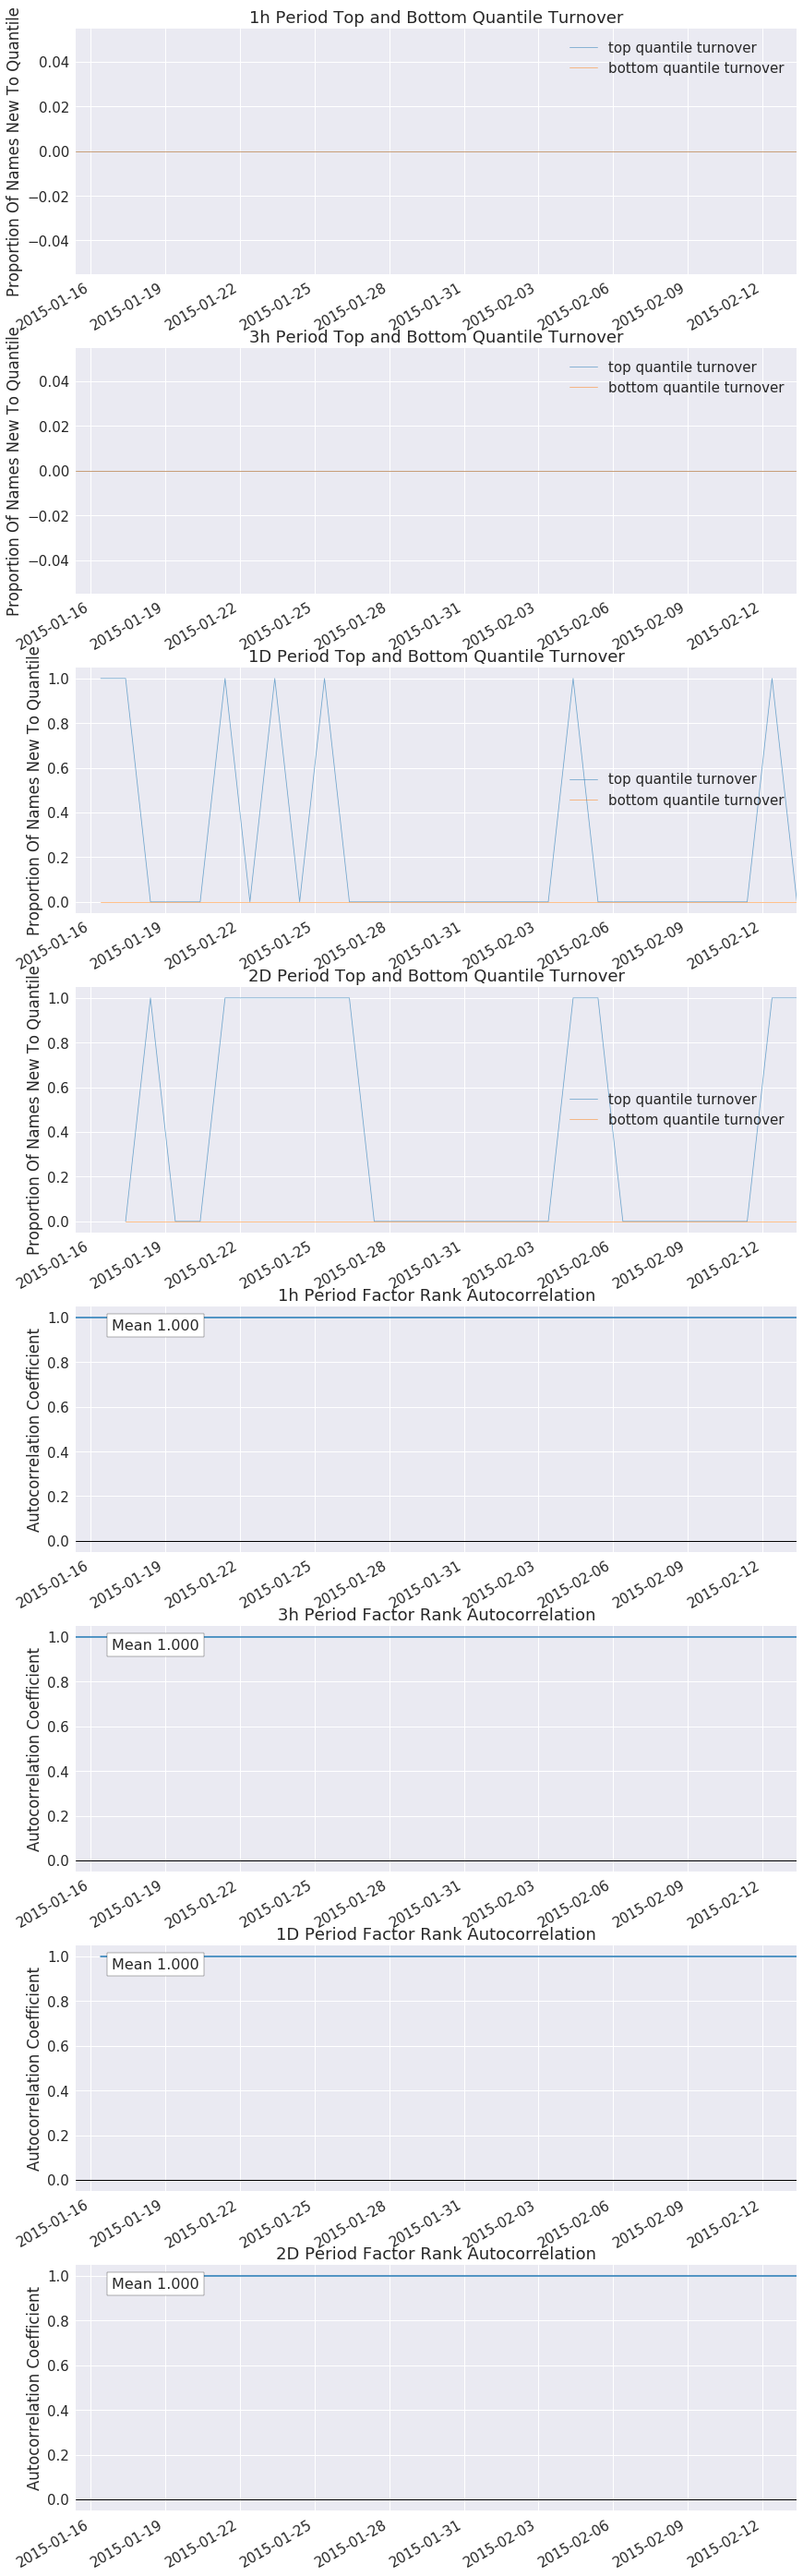

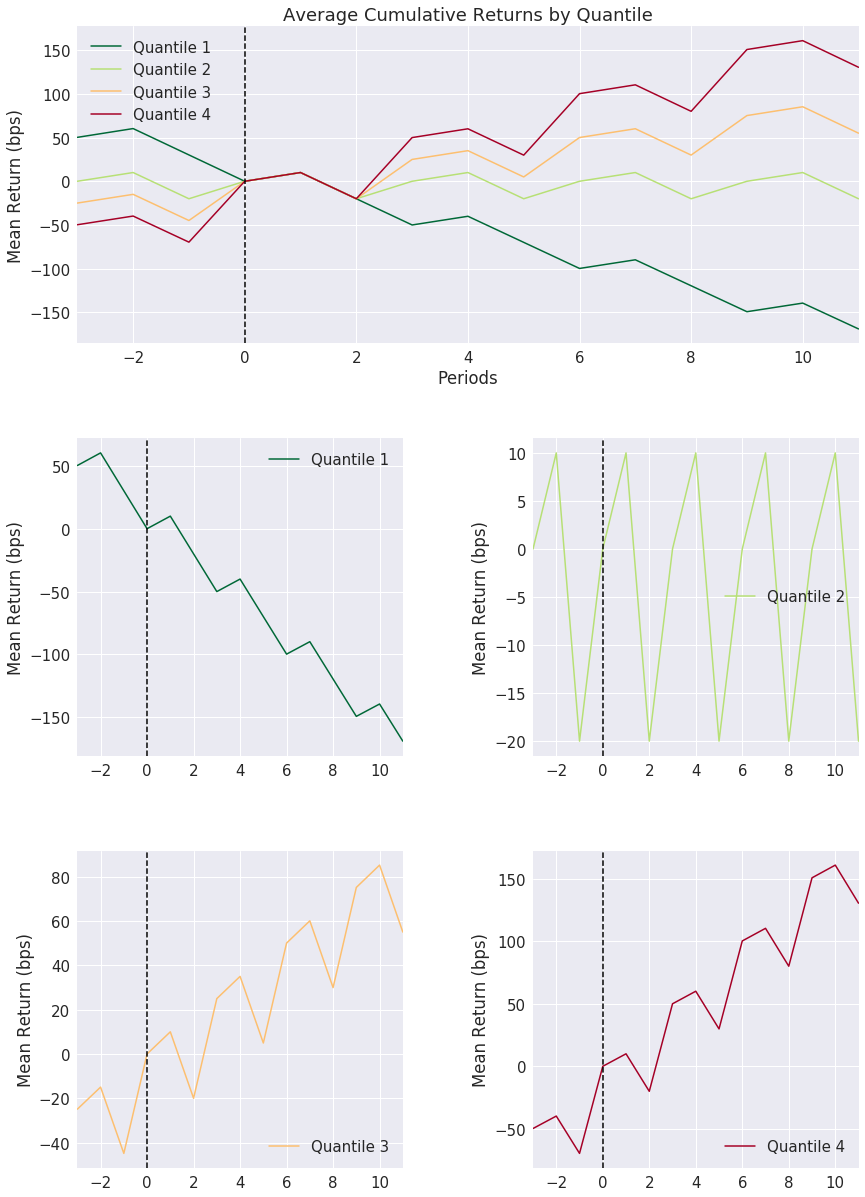

In [12]:
create_full_tear_sheet(factor_data, long_short=False, group_neutral=False, by_group=False)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=False, group_neutral=False, by_group=False)
plt.show()

Quantiles Statistics


min  max  mean  std  count  count %
factor_quantile                                     
1                1.0  1.0   1.0  0.0     30     25.0
2                2.0  2.0   2.0  0.0     30     25.0
3                3.0  3.0   3.0  0.0     30     25.0
4                4.0  4.0   4.0  0.0     30     25.0

Returns Analysis


1h   3h     1D     2D
Ann. alpha                                     0.0  0.0  1.778  1.772
beta                                           0.0  0.0  0.000  0.000
Mean Period Wise Return Top Quantile (bps)     0.0  0.0  1.819  1.817
Mean Period Wise Return Bottom Quantile (bps)  0.0  0.0 -2.350 -2.354
Mean Period Wise Spread (bps)                 -0.0  0.0  4.169  4.172

/home/luca/.local/lib/python2.7/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


Information Analysis


1h     3h        1D        2D
IC Mean           0.005 -0.109  1.000000  1.000000
IC Std.           0.441  0.500  0.000000  0.000000
Risk-Adjusted IC  0.012 -0.217       inf       inf
t-stat(IC)          NaN    NaN       inf       inf
p-value(IC)         NaN    NaN  0.000000  0.000000
IC Skew             NaN    NaN  0.000000  0.000000
IC Kurtosis         NaN    NaN -3.000000 -3.000000

Turnover Analysis


1D   1h     2D   3h
Quantile 1 Mean Turnover   0.000  0.0  0.000  0.0
Quantile 2 Mean Turnover   0.241  0.0  0.393  0.0
Quantile 3 Mean Turnover   0.000  0.0  0.000  0.0
Quantile 4 Mean Turnover   0.241  0.0  0.393  0.0

1h   3h   1D   2D
Mean Factor Rank Autocorrelation  1.0  1.0  1.0  1.0

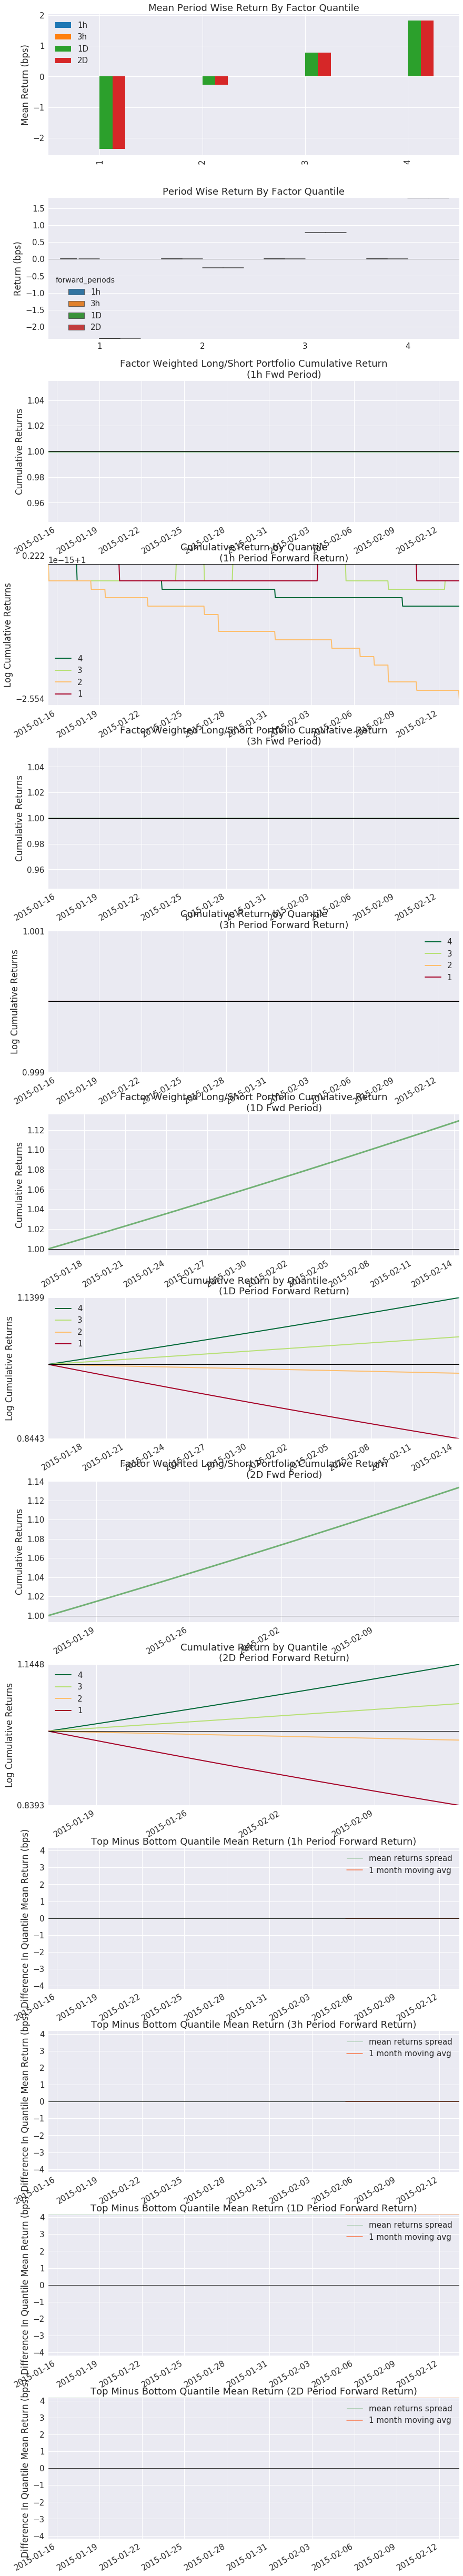

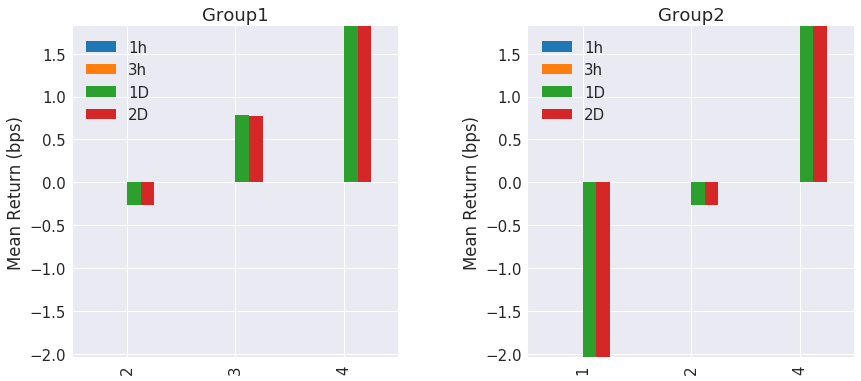

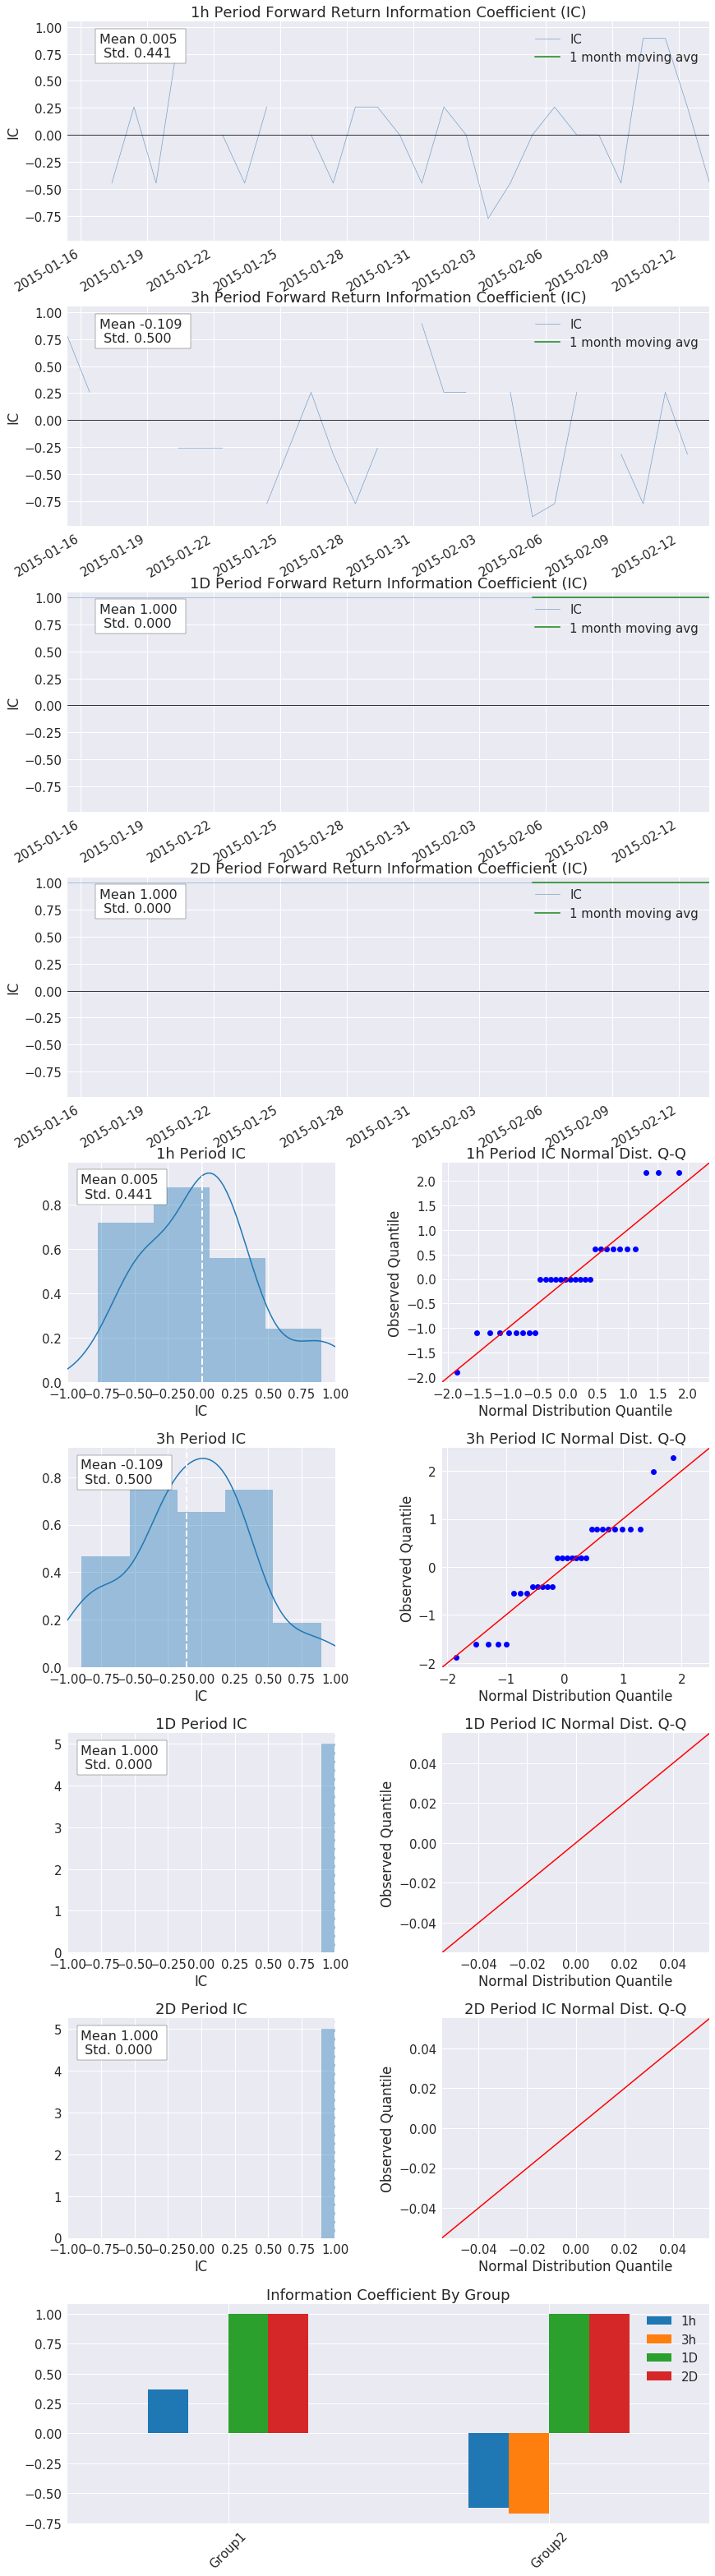

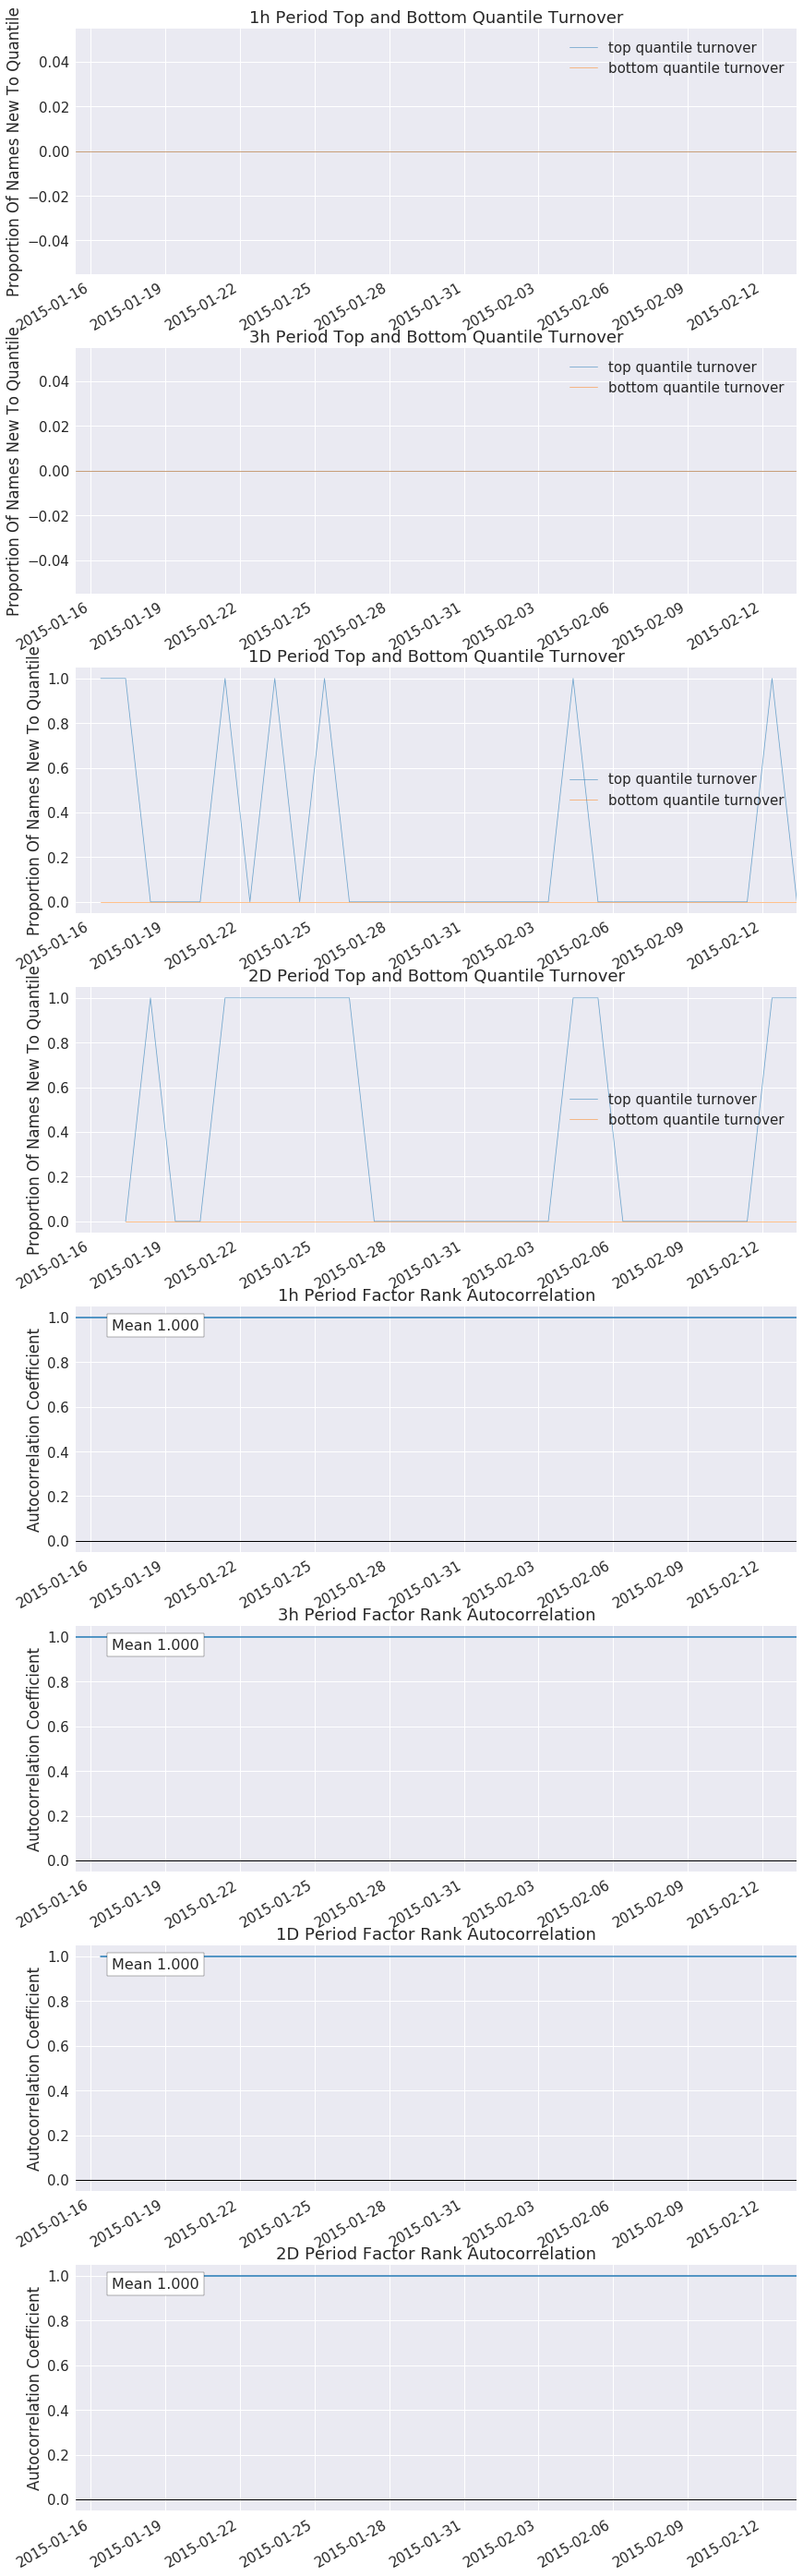

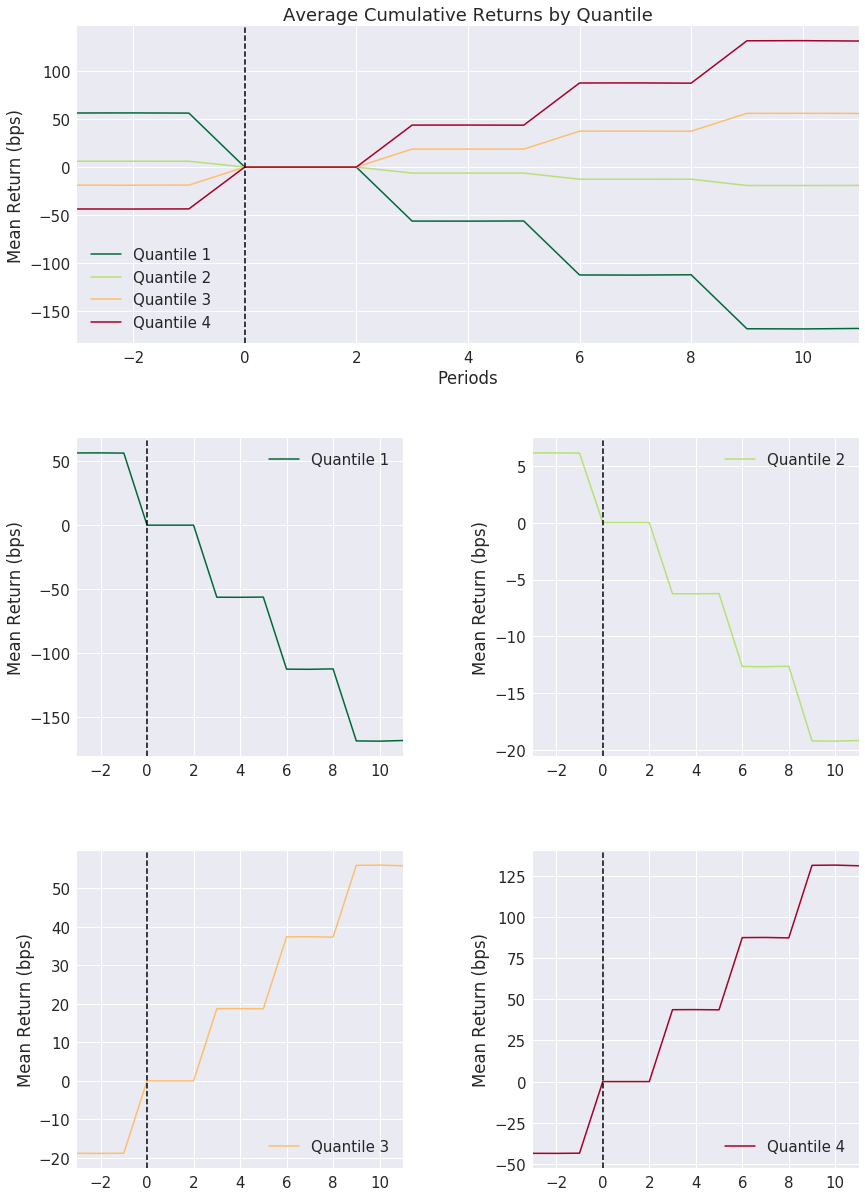

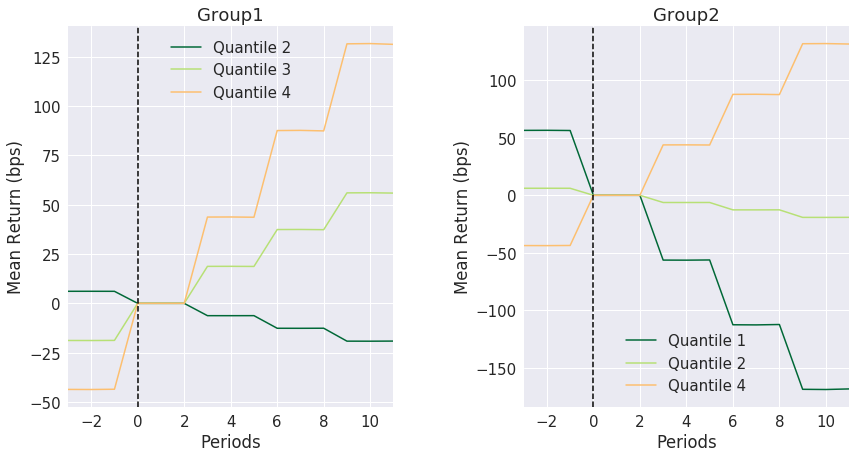

In [13]:
create_full_tear_sheet(factor_data, long_short=True, group_neutral=False, by_group=True)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=True, group_neutral=False, by_group=True)
plt.show()

Quantiles Statistics


min  max  mean  std  count  count %
factor_quantile                                     
1                1.0  1.0   1.0  0.0     30     25.0
2                2.0  2.0   2.0  0.0     30     25.0
3                3.0  3.0   3.0  0.0     30     25.0
4                4.0  4.0   4.0  0.0     30     25.0

Returns Analysis


1h   3h     1D     2D
Ann. alpha                                     0.0  0.0  0.876  0.875
beta                                          -0.0  0.0  0.000  0.000
Mean Period Wise Return Top Quantile (bps)     0.0  0.0  1.300  1.299
Mean Period Wise Return Bottom Quantile (bps)  0.0  0.0 -1.565 -1.567
Mean Period Wise Spread (bps)                 -0.0  0.0  2.865  2.865

Information Analysis


1h     3h      1D      2D
IC Mean          -0.066 -0.147   0.700   0.700
IC Std.           0.462  0.522   0.305   0.305
Risk-Adjusted IC -0.144 -0.282   2.294   2.294
t-stat(IC)          NaN    NaN  12.565  12.565
p-value(IC)         NaN    NaN   0.000   0.000
IC Skew             NaN    NaN   0.000   0.000
IC Kurtosis         NaN    NaN  -2.000  -2.000

Turnover Analysis


1D   1h     2D   3h
Quantile 1 Mean Turnover   0.000  0.0  0.000  0.0
Quantile 2 Mean Turnover   0.241  0.0  0.393  0.0
Quantile 3 Mean Turnover   0.000  0.0  0.000  0.0
Quantile 4 Mean Turnover   0.241  0.0  0.393  0.0

1h   3h   1D   2D
Mean Factor Rank Autocorrelation  1.0  1.0  1.0  1.0

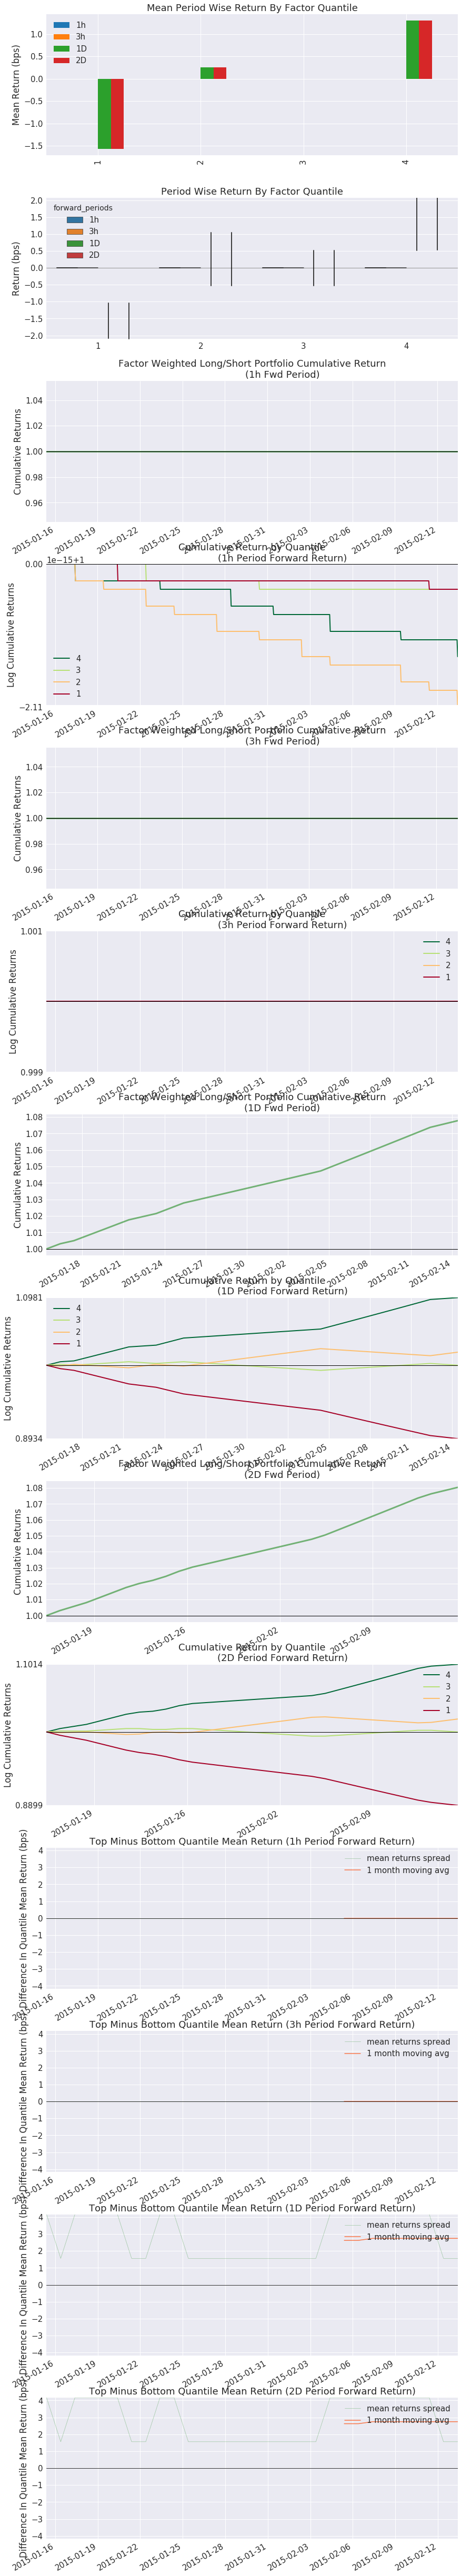

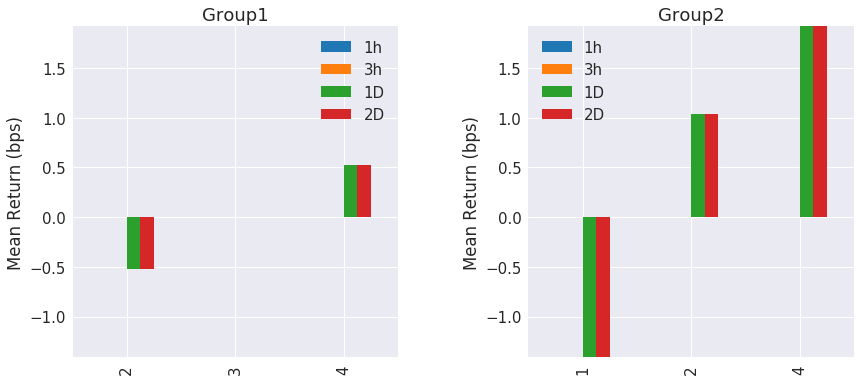

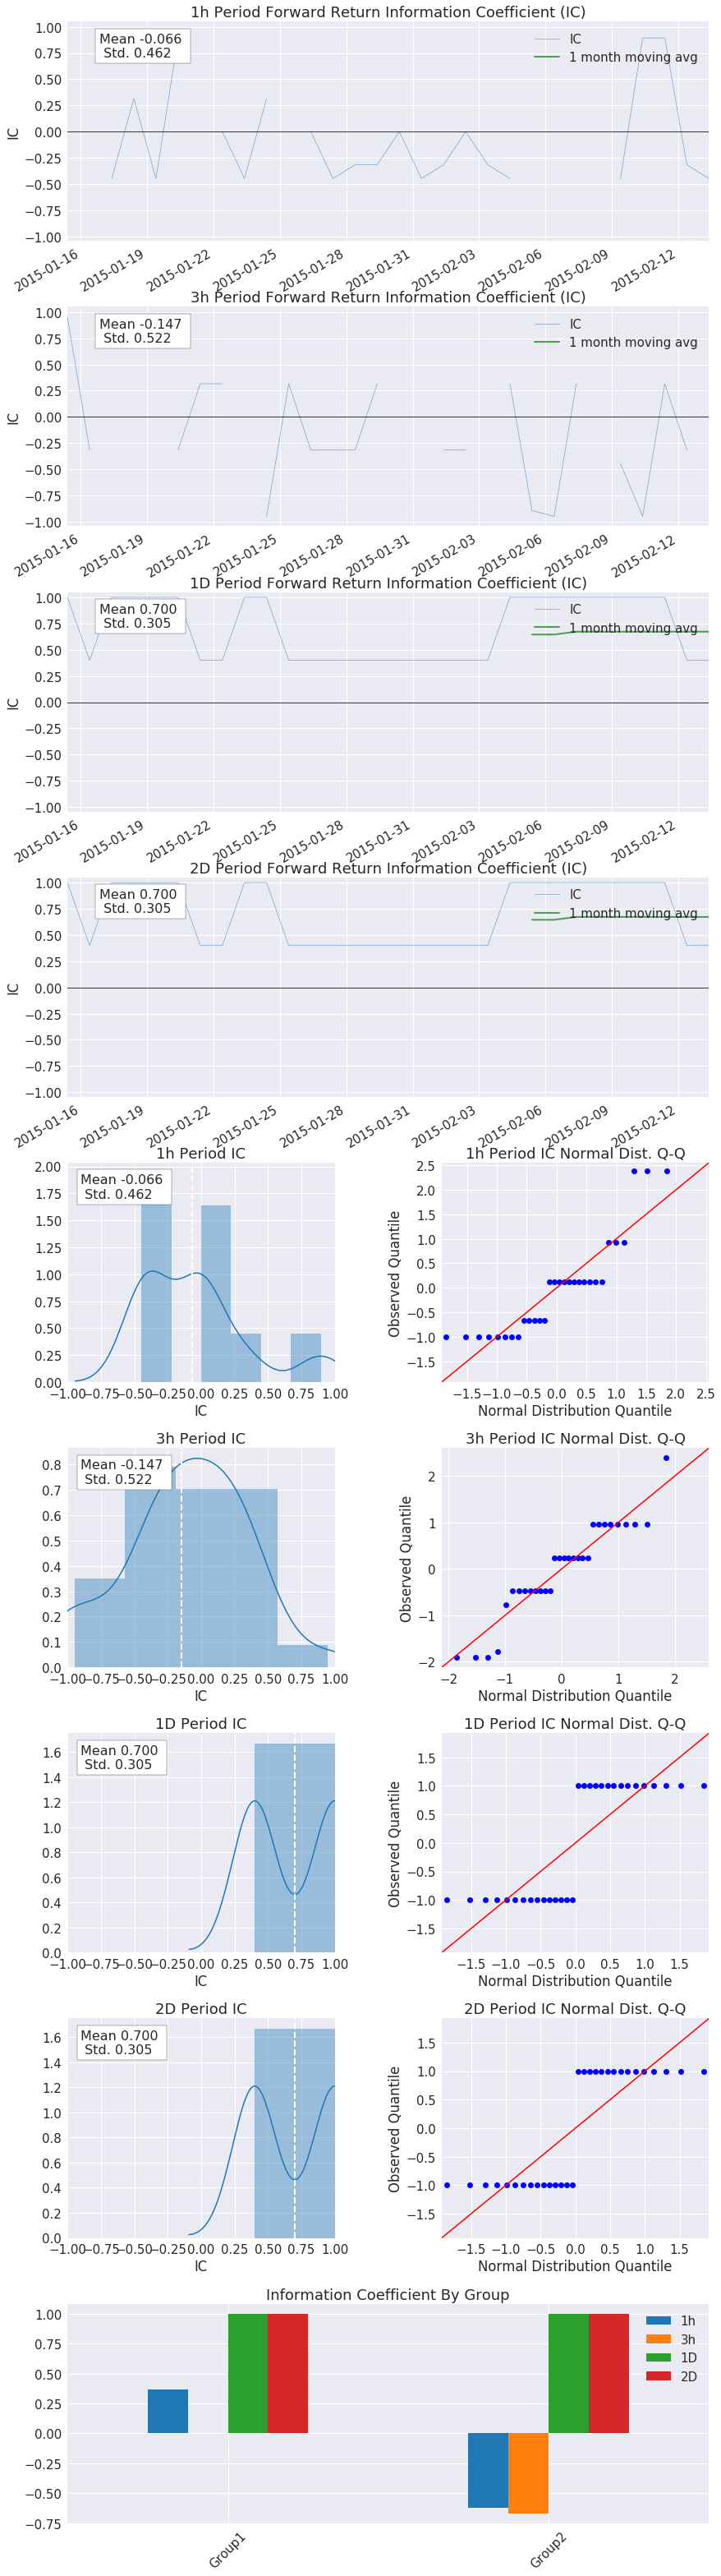

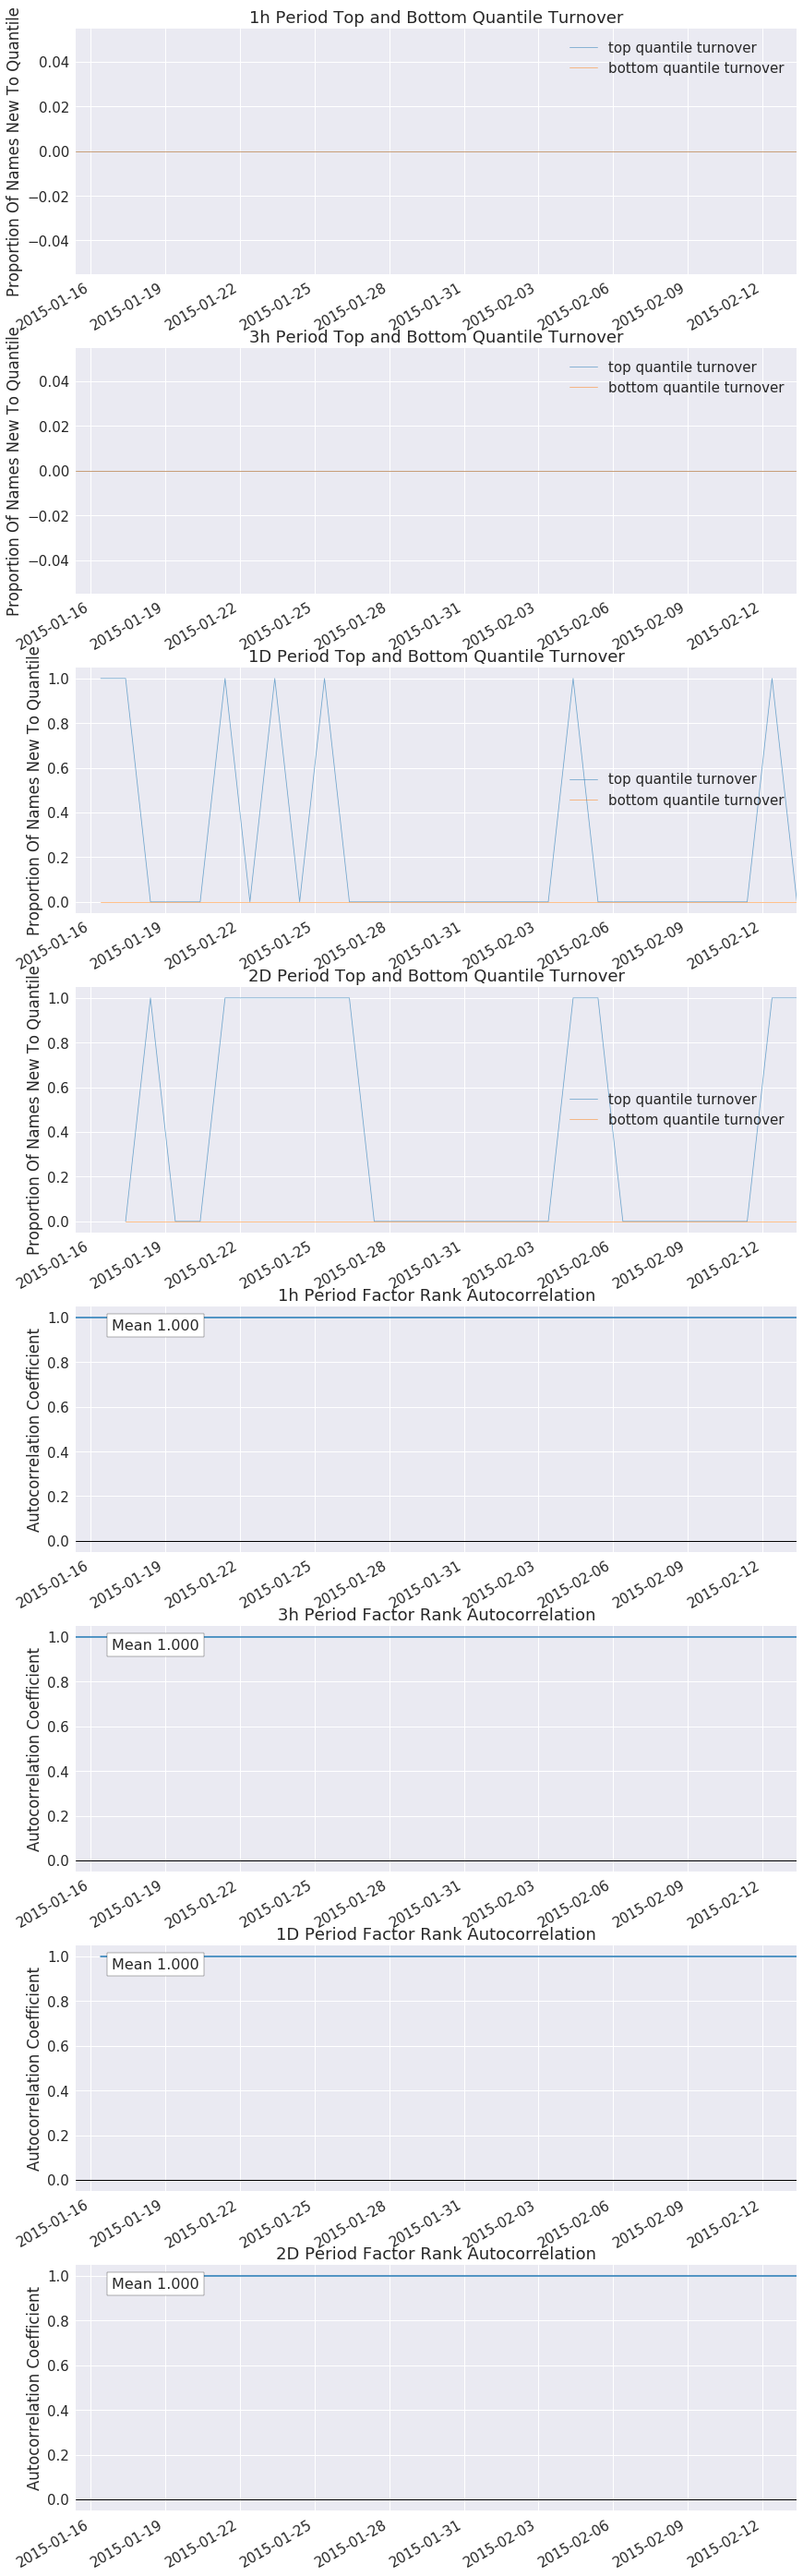

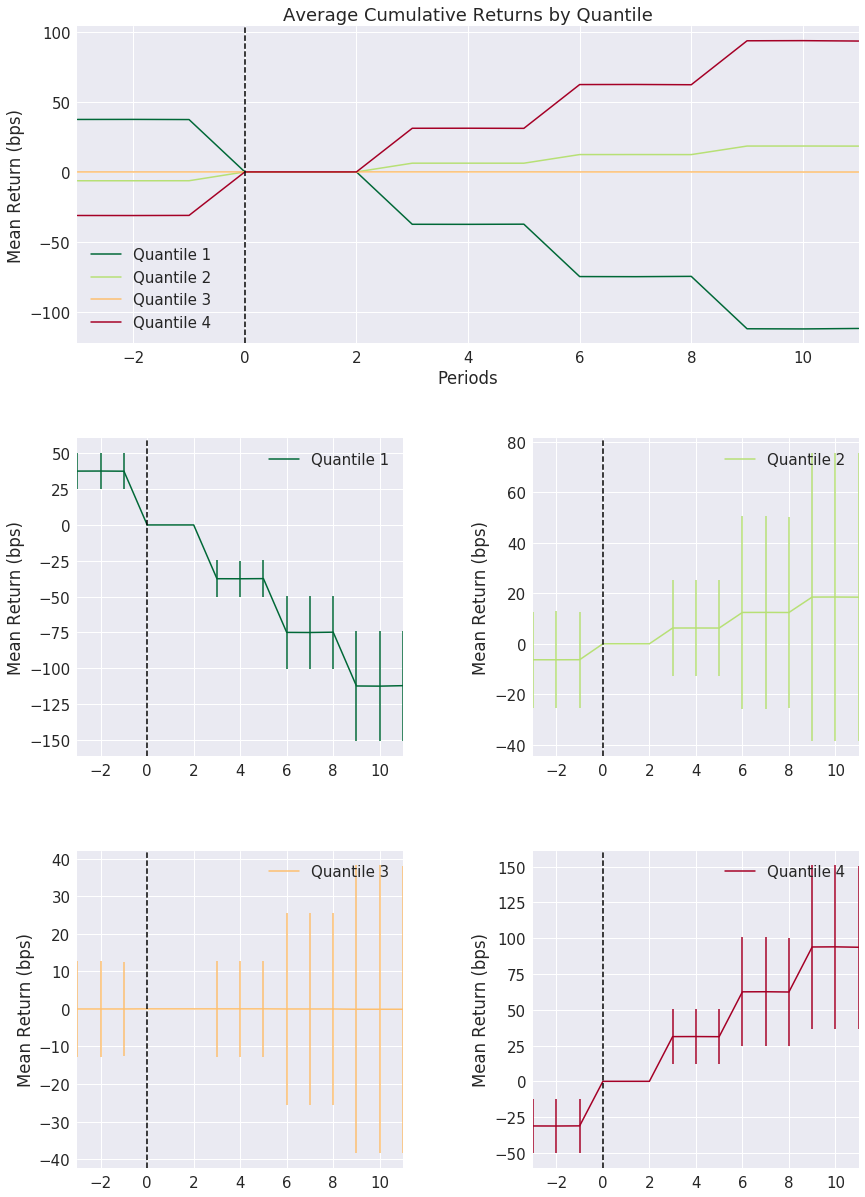

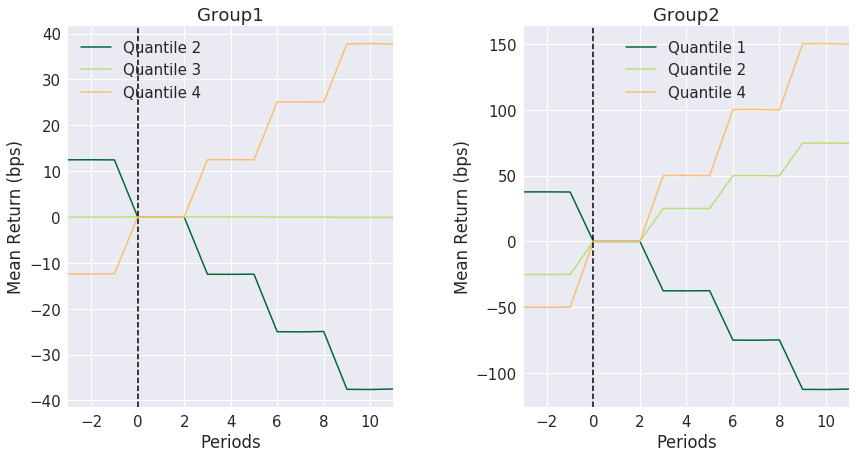

In [14]:
create_full_tear_sheet(factor_data, long_short=True, group_neutral=True, by_group=True)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=True, group_neutral=True, by_group=True)
plt.show()